In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the datasets
df = pd.read_csv('listings_cleaned.csv')
cal = pd.read_csv('calendar.csv')

# Samples and Features

In [3]:
samples1, features1 = df.shape

samples2, features2 = cal.shape

print(f"In the listing_cleaned file, the number of features is:{features1} and the number of samples is:{samples1}.")
print(f"In the calendar file, the number of features is:{features2} and the number of samples is:{samples2}.")
#Otherwise, we can simply run the df and cal dataframes (or df.info()) and the dimensions of each table are shown.

In the listing_cleaned file, the number of features is:52 and the number of samples is:9455.
In the calendar file, the number of features is:6 and the number of samples is:1048575.


# Types of features

With the method dtypes we can check the data type of each feature in both of our files.
With the info() method we can examine and the exact size of each type category.
In the listings_cleaned file we found:  float64(15 features), int64(16 features), object(21 features).
In the calendar file we found:  float64(2 features), int64(1 feature), object(3 features)


In [4]:
df.dtypes
# df.info()

id                                                int64
host_id                                           int64
host_name                                        object
host_since                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                   

In [5]:
cal.dtypes
# cal.info()

listing_id          int64
date               object
available          object
price              object
minimum_nights    float64
maximum_nights    float64
dtype: object

# Missing values

In [6]:
print(f"The total number of missing values in the listings_cleaned file is {df.isna().sum().sum()} and the number of rows affected: {df.isna().any(axis=1).sum()}.")
print(f"The total number of missing values in the calendar file is {cal.isna().sum().sum()} and the number of rows affected: {cal.isna().any(axis=1).sum()}.")

The total number of missing values in the listings_cleaned file is 44388 and the number of rows affected: 9455.
The total number of missing values in the calendar file is 132 and the number of rows affected: 66.


# Listings per neighbourhood

In 'neigbourhood_cleansed' and 'id' columns there are no missing values. 

In [7]:
print(f" We have {df['neighbourhood_cleansed'].isna().sum()} missing values in \'neighbourhood_cleansed\' and {df['id'].isna().sum()} missing values in \'id\' columns")

 We have 0 missing values in 'neighbourhood_cleansed' and 0 missing values in 'id' columns


In [8]:
listings_per_neighbourhood = df.groupby(['neighbourhood_cleansed'])['id'].count().sort_values(ascending=False)
for neighbourhood in listings_per_neighbourhood.index:
  print(f'In the neighbourhood {neighbourhood} there are {listings_per_neighbourhood[neighbourhood]} listings')

In the neighbourhood ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ there are 1733 listings
In the neighbourhood ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ there are 820 listings
In the neighbourhood ΝΕΟΣ ΚΟΣΜΟΣ there are 721 listings
In the neighbourhood ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ there are 689 listings
In the neighbourhood ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ there are 581 listings
In the neighbourhood ΠΑΓΚΡΑΤΙ there are 409 listings
In the neighbourhood ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ there are 405 listings
In the neighbourhood ΑΚΡΟΠΟΛΗ there are 319 listings
In the neighbourhood ΚΟΛΩΝΑΚΙ there are 317 listings
In the neighbourhood ΑΜΠΕΛΟΚΗΠΟΙ there are 292 listings
In the neighbourhood ΘΗΣΕΙΟ there are 281 listings
In the neighbourhood ΚΕΡΑΜΕΙΚΟΣ there are 242 listings
In the neighbourhood ΚΥΨΕΛΗ there are 234 listings
In the neighbourhood ΠΕΤΡΑΛΩΝΑ there are 230 listings
In the neighbourhood ΣΤΑΔΙΟ there are 176 listings
In the neighbourhood ΙΛΙΣΙΑ there are 174 listings
In the neighbourhood ΓΟΥΔΙ there are 150 listings
In the neighbourhood ΖΑΠΠΕΙΟ

# Listings per room type

We have no missing values in 'room_type' column.

In [9]:
print(f"There are {df['room_type'].isna().sum()} missing values in \'room_type\' column.")

There are 0 missing values in 'room_type' column.


In [10]:
listings_per_room_type = df.groupby(['room_type'])['id'].count().sort_values(ascending=False)
for room_type in listings_per_room_type.index:
  print(f'There are {listings_per_room_type[room_type]} listings for the room type {room_type}')

There are 8270 listings for the room type Entire home/apt
There are 932 listings for the room type Private room
There are 179 listings for the room type Hotel room
There are 74 listings for the room type Shared room


# Listings per room number

When we talk about room number do we refer to the bedroom?
Should we include and the bathrooms in the calculation? Also there is an outlier we should deal with (33).
In this question, we examined only the bedrooms as rooms.
First, we replace missing values in 'bedrooms' column with the median of the column. The type of the room with the outlier value of 33 bedrooms is private room and it offers accomodation to 2 people ('accomodates' column is set to 2). So we set the number of bedrooms to 1.

In [11]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df[df['bedrooms'] == 33].index #the index of listing ith 33 bedrooms
df.loc[df[df['bedrooms'] == 33].index,'bedrooms'] = 1

In [12]:
listings_per_room_number = df.groupby(['bedrooms'])['id'].count().sort_values(ascending=False)
for bedrooms in listings_per_room_number.index:
  print(f'There are {listings_per_room_number[bedrooms]} listings with {int(bedrooms)} bedrooms')

There are 6082 listings with 1 bedrooms
There are 2603 listings with 2 bedrooms
There are 570 listings with 3 bedrooms
There are 133 listings with 4 bedrooms
There are 32 listings with 5 bedrooms
There are 27 listings with 6 bedrooms
There are 4 listings with 10 bedrooms
There are 2 listings with 7 bedrooms
There are 1 listings with 8 bedrooms
There are 1 listings with 9 bedrooms


# Distribution of Listings per host

If we examine the column df['host_total_listings_count'], with the describe method, we will see that the majority of the samples are between 0-10. The max value is 942, which is an outlier. . With a better look to the data, we saw that df['calculated_host_listings_count'] seems to have the correct values since the range is in 75% [1,8].
So, probably, it would make more sense if we plot the histogram in the range [0-20]

1      3817
2       525
3       218
4       116
5        89
6        55
7        35
8        25
9        21
11       10
13        9
10        9
12        8
16        6
14        5
15        4
25        4
19        3
26        3
17        3
18        3
21        2
22        2
23        2
29        2
32        2
70        2
20        1
39        1
69        1
67        1
64        1
57        1
49        1
35        1
38        1
36        1
31        1
30        1
28        1
24        1
101       1
Name: calculated_host_listings_count, dtype: int64

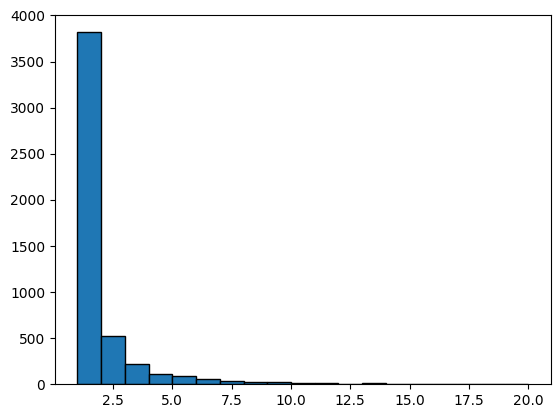

In [13]:
listings_per_host = df.groupby(['host_id'])['calculated_host_listings_count'].max().sort_values(ascending=False)
listings_per_host.value_counts().sort_index()
plt.hist(listings_per_host,bins=19, edgecolor='black', range=[1, 20]);
listings_per_host.value_counts()

While checking the rows with the max listings, we realized that they referred to a company named Homm and can include many hosts.. In any way, this company seems to have the most listings according to this dataset.

In [14]:
df[df['calculated_host_listings_count'] == 101]

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
758,10588538,29927830,Homm ®,2015-03-24,within an hour,100%,100%,f,181.0,181.0,...,10.0,9.0,9.0,1083774,t,101,101,0,0,3.81
1321,15083903,29927830,Homm ®,2015-03-24,within an hour,100%,100%,f,181.0,181.0,...,10.0,8.0,9.0,1011552,t,101,101,0,0,2.84
1356,15409164,29927830,Homm ®,2015-03-24,within an hour,100%,100%,f,181.0,181.0,...,10.0,10.0,9.0,544540,t,101,101,0,0,3.51
1535,16608352,29927830,Homm ®,2015-03-24,within an hour,100%,100%,f,181.0,181.0,...,10.0,10.0,9.0,996869,t,101,101,0,0,3.90
1555,16785744,29927830,Homm ®,2015-03-24,within an hour,100%,100%,f,181.0,181.0,...,10.0,8.0,9.0,1083955,t,101,101,0,0,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9109,44937114,29927830,Homm ®,2015-03-24,within an hour,100%,100%,f,181.0,181.0,...,NaN,NaN,NaN,1100958,t,101,101,0,0,NaN
9210,45377937,29927830,Homm ®,2015-03-24,within an hour,100%,100%,f,181.0,181.0,...,NaN,NaN,NaN,1084224,t,101,101,0,0,NaN
9377,45836431,29927830,Homm ®,2015-03-24,within an hour,100%,100%,f,181.0,181.0,...,NaN,NaN,NaN,1093294,t,101,101,0,0,NaN
9407,45890515,29927830,Homm ®,2015-03-24,within an hour,100%,100%,f,181.0,181.0,...,NaN,NaN,NaN,1101429,t,101,101,0,0,NaN


In [15]:
print(f"The most listings that a single host has is {max(df['calculated_host_listings_count'])}.")

The most listings that a single host has is 101.


# The first host 

In [16]:
#Let's make sure 'host_since' is actually a date in pandas
df['host_since'] = pd.to_datetime(df['host_since'])
# df['host_since'] = df['host_since'].apply(lambda x: x.date())
print(f"The first host registered at: {min(df['host_since'])}.")
# df['host_since'].isna().sum()

The first host registered at: 2009-09-08 00:00:00.


# Year with the most hosts registered

In [17]:
df['host_since'] = pd.to_datetime(df['host_since'])
print(f"The year {int(df['host_since'].dt.year.value_counts().index[0])} had the most hosts registered with {df['host_since'].dt.year.value_counts().max()} hosts.")

The year 2018 had the most hosts registered with 1766 hosts.


# Range of the calendar

If the column date was presented as a time series, we could have seen the range if we have called the day started as cal.date[0] and the last day as cal['date'].iloc[-1]. But in this case, we examine that the data arent sorted according to dates.

In [18]:
# cal.date[cal.date == max(cal['date'])].index.tolist()
cal['date'] = pd.to_datetime(cal['date'])
cal['date'] = cal['date'].apply(lambda x: x.date())
print(f"The range of the calendar is from {min(cal['date'])} to {max(cal['date'])}.")

The range of the calendar is from 2020-10-25 to 2021-10-25.


# Distribution of bookings by month

In [19]:
print(f"Are there any NaN data? -{cal['available'].isnull().values.any()}.")
if cal['available'].isnull().values.any()== True:
    print(f"In the avaliable column are {cal['available'].isnull().sum().sum()} NaN.")
cal['available'].unique()

Are there any NaN data? -False.


array(['f', 't'], dtype=object)

We made a new DF with dates and the availability of bookings. There are no NAN variables. Whether avaliable = 'f', means that the airbnb is booked.

<AxesSubplot: xlabel='month', ylabel='count_bookings'>

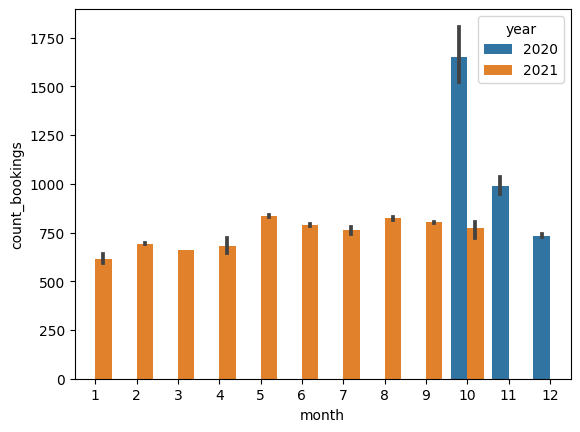

In [40]:
# Create a DataFrame 'bookings' using the 'date' and 'available' columns from 'cal'
bookings = pd.DataFrame(cal[['date', 'available']])

# Filter the DataFrame to include only rows where 'available' is 'f' (not available)
bookings = bookings[bookings['available'] == 'f']

# Create a new DataFrame with the count of bookings per date
bookings = pd.DataFrame(bookings['date'].value_counts())

# Reset the index of the DataFrame and rename the columns
bookings = bookings.reset_index()
bookings.rename(columns={'index': 'Date', 'date': 'count_bookings'}, inplace=True)


# Extract month and year information from the 'Date' column
m = pd.DatetimeIndex(bookings["Date"])
bookings['month'] = m.month
bookings['year'] = m.year

# Define a function to assign seasons based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the 'get_season' function to create a new 'season' column
bookings['season'] = bookings['month'].apply(get_season)

# Create a bar plot using seaborn to visualize the count of bookings per month, grouped by year
sns.barplot(data=bookings, x='month', y='count_bookings', hue='year')

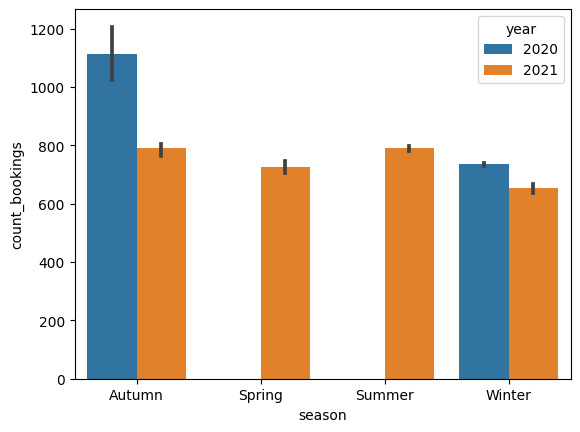

In [41]:
sns.barplot(data=bookings, x='season', y='count_bookings',hue='year');

To examine the distribution per month, in time series data, the box plot is a helpful tool.

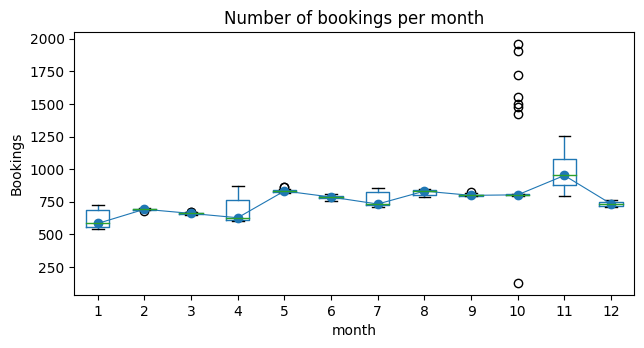

In [22]:
fig,ax = plt.subplots(figsize=(7, 3.5))

bookings.boxplot(column='count_bookings',by='month',ax=ax)
bookings.groupby('month')["count_bookings"].median().plot(style="o-", linewidth=0.8, ax=ax)
ax.set_ylabel("Bookings")
ax.set_title("Number of bookings per month")
fig.suptitle("");

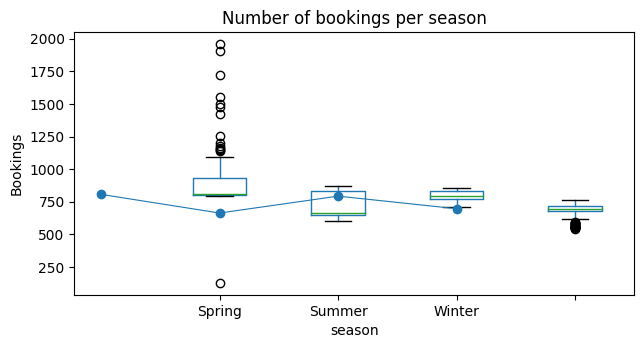

In [23]:
fig,ax = plt.subplots(figsize=(7, 3.5))

bookings.boxplot(column='count_bookings',by='season',ax=ax)
bookings.groupby('season')["count_bookings"].median().plot(style="o-", linewidth=0.8, ax=ax)
ax.set_ylabel("Bookings")
ax.set_title("Number of bookings per season")
fig.suptitle("");

# Time periods with the biggest percentage of bookings

In [24]:
a = pd.DataFrame(bookings[['month','year','count_bookings']])
a = a.reset_index()
a = a.groupby(['year', 'month'])['count_bookings'].sum()
a = a.reset_index()

a['m/y']=a['year'].astype(str) + a['month'].astype(str).str.zfill(2)
a['m/y'] = pd.to_datetime(a['m/y'], format='%Y%m')
a["m/y"] =a["m/y"].dt.strftime('%Y-%m') 
a['%'] = 100 * a['count_bookings'] / sum(a['count_bookings'])
a =a[['m/y', 'count_bookings', '%']]
print(f" The {round(max(a['%']))}% of the bookings in our listings were at {a['m/y'].iloc[a['%'].idxmax()]}.")
a.sort_values(by="%", ascending=False)

 The 10% of the bookings in our listings were at 2020-11.


,m/y,count_bookings,%
1,2020-11,29697,10.402662
7,2021-05,25885,9.067344
10,2021-08,25489,8.928628
11,2021-09,24051,8.424906
8,2021-06,23616,8.272528
9,2021-07,23594,8.264822
2,2020-12,22772,7.976881
5,2021-03,20486,7.176110
6,2021-04,20448,7.162799
4,2021-02,19409,6.798844


# Higher prices

In [25]:
#Check for nan values and transform the prices in the right float form.
cal['price'].isnull().values.any()
cal['price'] = cal['price'].str.replace('$', '')
cal['price'] = cal['price'].str.replace(',', '')
cal['price'] = cal['price'].astype(float)

C:\Users\siaza\AppData\Local\Temp\ipykernel_2916\3617227614.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cal['price'] = cal['price'].str.replace('$', '')


In [26]:
p = pd.DataFrame(cal[['date','price']])
p = p.groupby(['date'])["price"].mean()

p = pd.DataFrame(p)  
p = p.reset_index()
m = pd.DatetimeIndex(p["date"])
p['month']= m.month
p['year']=m.year

#I have already called this function, but i recall it in case we want to run only specific cells..
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

p['season'] = p['month'].apply(get_season)
pseason = p.groupby(['season']).mean()
pseason = pseason.sort_values(by="price", ascending=False)
pseason = pseason.reset_index()
pseason=pseason[['season','price']]
print(pseason)
print(f"The prices seems to be higher on {pseason['season'].iloc[0]} with mean price {round(pseason['price'].iloc[0])}$.");


   season       price
0  Summer  110.595770
1  Autumn  103.348774
2  Spring   98.356970
3  Winter   82.857423
The prices seems to be higher on Summer with mean price 111$.


C:\Users\siaza\AppData\Local\Temp\ipykernel_2916\1541632589.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pseason = p.groupby(['season']).mean()


# Identified hosts

In [27]:
#Check for NaN samples in the host_identity_verified column
print(f"Are there any NaN data? -{df['host_identity_verified'].isnull().values.any()}.")
if df['host_identity_verified'].isnull().values.any()== True:
    print(f"In the host_identity_verified column are {df['host_identity_verified'].isnull().sum().sum()} NaN.")


Are there any NaN data? -True.
In the host_identity_verified column are 4 NaN.


Since the number of Nan variables is not statistical important according to all of the samples, we can simply drop nan rows or consider them as non identified hosts.

In [28]:
# Extracting the 'host_identity_verified' column from the DataFrame and dropping any NaN values
identity = df['host_identity_verified'].dropna()

# Creating a new DataFrame using the extracted column
identity = pd.DataFrame(identity)

# Converting 't' values to 1 and 'f' values to 0 in the 'host_identity_verified' column
identity['host_identity_verified'] = identity['host_identity_verified'].str.replace('t', '1')
identity['host_identity_verified'] = identity['host_identity_verified'].str.replace('f', '0')

# Converting the values in the 'host_identity_verified' column to integers
identity['host_identity_verified'] = identity['host_identity_verified'].astype(int)

# Counting the number of identified hosts by summing the 'host_identity_verified' column
identified_hosts = sum(identity['host_identity_verified'])

# Calculating the total number of hosts, including identified, non-identified, and NaN samples
all_hosts = identity['host_identity_verified'].shape[0] + df['host_identity_verified'].isnull().sum().sum()

# Printing the results
print(f"The number of identified hosts is {identified_hosts} and their percentage over all hosts is {round((identified_hosts/all_hosts)*100)}%.")


The number of identified hosts is 6262 and their percentage over all hosts is 66%.


# Top 10 most common amenities

We examined the column amenities and we realized that it is a column of strings no matter that each string has the form of a list. So, we call ast to convert to lists. After that, we Concatenate the dummy variables.

In [29]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Convert the 'amenities' column from string representation to a list of items
df['lists_column'] = df['amenities'].apply(lambda x: ast.literal_eval(x))

# Create a DataFrame 'amen' using the 'lists_column' column
amen = pd.DataFrame(df['lists_column'])

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'lists_column' into binary columns
dummy_variables = pd.DataFrame(mlb.fit_transform(amen['lists_column']), columns=mlb.classes_)

# Concatenate the dummy variables with the original DataFrame 'amen'
amen = pd.concat([amen, dummy_variables], axis=1)

# Remove the original 'lists_column' column
amen.drop('lists_column', axis=1, inplace=True)

# Calculate the column sums and find the 10 largest columns
largest_columns = amen.sum().nlargest(10)
largest_columns = pd.DataFrame(largest_columns)

# Print the top 10 most common amenities
print(f"The top 10 most common amenities are: {largest_columns.index}")

# Alternatively, we can use the value_counts() method to get the counts of each amenity
# amen.value_counts()


The top 10 most common amenities are: Index(['Wifi', 'Essentials', 'Air conditioning', 'Hair dryer', 'Hangers',
       'Kitchen', 'TV', 'Shampoo', 'Iron', 'Heating'],
      dtype='object')


# Top 10 rated listings

In [30]:
reviews = df['review_scores_rating']
#Check for NaN samples in the review_scores_rating
print(f"Are there any NaN data? -{df['review_scores_rating'].isnull().values.any()}.")
if df['review_scores_rating'].isnull().values.any()== True:
    print(f"In the review_scores_rating column are {df['review_scores_rating'].isnull().sum().sum()} NaN.")
    
#The nan values are not a lot, we can either drop the nan data, in order to answer in this question or 
#just replace them with a mean rate value. In this specific case, NaN samples can be seen because for example 
#the host is new and no one has rated him yet.

Are there any NaN data? -True.
In the review_scores_rating column are 2235 NaN.


In [31]:
reviews_mean = df['review_scores_rating'].mean()

# Fill missing values in the 'review_scores_rating' column with the mean value
df['review_scores_rating'].fillna(reviews_mean, inplace=True)

# Count the number of remaining missing values in the 'review_scores_rating' column
missing_values_count = df['review_scores_rating'].isna().sum()

# Sort the DataFrame by the 'review_scores_rating' column in descending order
# If ratings are the same, sort by 'number_of_reviews' column in descending order as well
sorted_df = df.sort_values(by=['review_scores_rating', 'number_of_reviews'], ascending=[False, False])

# Select the top 10 listings based on the highest ratings
top_10_listings = sorted_df.loc[:, ['review_scores_rating', 'host_name', 'number_of_reviews']].head(10)

# Print the top 10 rated listings with their review scores, host names, and number of reviews
print(f"Top 10 rated listings: {top_10_listings}")

# Alternatively, you can use the describe() method to get various statistics of the 'review_scores_rating' column
# df['review_scores_rating'].describe()


Top 10 rated listings:       review_scores_rating          host_name  number_of_reviews
42                   100.0               Agis                435
1418                 100.0          Vassilios                384
838                  100.0              Panos                282
468                  100.0           Κaterina                281
137                  100.0              Magda                263
82                   100.0               Rich                236
1444                 100.0              Kleio                234
139                  100.0  Greece You Around                219
1278                 100.0  Michaelis & Irene                209
1626                 100.0          Ma Maison                209


The nan values are not a lot, we can either drop the nan data, in order to answer in this question or just replace them with a mean rate value. In this specific case, NaN samples can be seen because for example the host is new and no one has rated him yet. So, the most logical action could be not to remove the whole row of our dataset, but to create a new specific series/DF with this column and without the Nan variables.

# Top-5 rated locations/neighborhoods

Handling missing values and Getting the 5 top rated neighborhoods

In [32]:
# Replace missing values in the 'review_scores_location' column with the mean value
df['review_scores_location'] = df['review_scores_location'].apply(lambda x: df['review_scores_location'].mean() if np.isnan(x) else x)

# Count the occurrences of each review score
# review_mean.value_counts()

# Calculate the average rating for each neighborhood based on the 'review_scores_location' column
neighborhood_ratings = df.groupby('neighbourhood_cleansed')['review_scores_location'].mean()

# Sort the neighborhoods by their average rating in descending order
sorted_neighborhoods = neighborhood_ratings.sort_values(ascending=False)

# Select the top 5 rated neighborhoods
top_5_neighborhoods = sorted_neighborhoods.head(5)

# Print the top 5 rated neighborhoods with their average ratings
print(f"Top 5 rated neighborhoods: {top_5_neighborhoods}")





Top 5 rated neighborhoods: neighbourhood_cleansed
ΚΟΛΩΝΑΚΙ               9.876523
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ    9.856597
ΡΗΓΙΛΛΗΣ               9.833954
ΑΚΡΟΠΟΛΗ               9.807037
ΘΗΣΕΙΟ                 9.802676
Name: review_scores_location, dtype: float64


# Time periods with most submitted reviews

In [33]:
# To answer this question, we consider the first and last reviews of each host and identify common periods.

# Select the 'first_review' and 'last_review' columns from the DataFrame
reviewsPeriod = df[['first_review', 'last_review']]

# Create a new DataFrame using the selected columns
reviewsPeriod = pd.DataFrame(reviewsPeriod)

# Convert the 'first_review' and 'last_review' columns to datetime format
reviewsPeriod['first_review'] = pd.to_datetime(reviewsPeriod['first_review'])
reviewsPeriod['last_review'] = pd.to_datetime(reviewsPeriod['last_review'])

# Find the most common first and last review dates
most_samples_period = reviewsPeriod['first_review'].value_counts().idxmax(), reviewsPeriod['last_review'].value_counts().idxmax()

# Print the period with the most samples
print("Most samples occurred from", most_samples_period[0], "to", most_samples_period[1])


Most samples occurred from 2019-04-14 00:00:00 to 2020-10-11 00:00:00


# Distribution of score ratings

c:\users\siaza\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\siaza\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


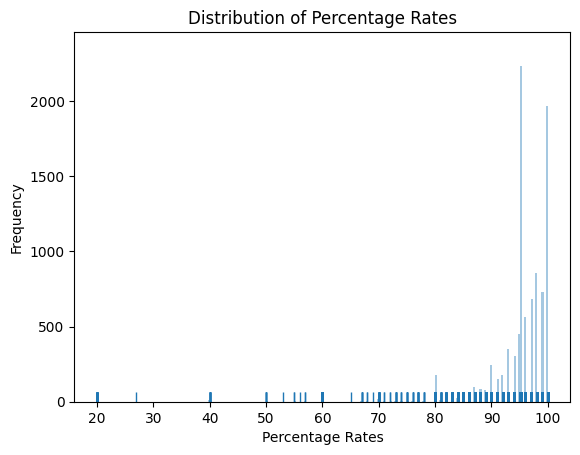

In [34]:
# Create a distribution plot

# Select the 'review_scores_rating' column from the DataFrame
reviews = df['review_scores_rating']

# Create a DataFrame for the 'review_scores_rating' column
reviews = pd.DataFrame(reviews)

# Drop rows with NaN values in the 'review_scores_rating' column
reviews = reviews.dropna(axis=0, how='all')

# Calculate the interquartile range (IQR) of the 'review_scores_rating' column
iqr = np.percentile(reviews['review_scores_rating'], 75) - np.percentile(reviews['review_scores_rating'], 25)

# Calculate the bin width for the distribution plot
bin_width = 2 * iqr / (len(reviews['review_scores_rating']) ** (1/3))

# Calculate the number of bins based on the bin width
num_bins = int((max(reviews['review_scores_rating']) - min(reviews['review_scores_rating'])) / bin_width)

# Create a distribution plot using seaborn
sns.distplot(reviews['review_scores_rating'], bins=num_bins, kde=False, rug=True)

# Set the labels and title for the plot
plt.xlabel('Percentage Rates')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Rates')

# Display the plot
plt.show()


# Are there lots of reviews scoring < 50?

In [35]:
# Count the number of ratings below 50
low_ratings_count = df[df['review_scores_rating'] < 50]['review_scores_rating'].count()

# Calculate the percentage of ratings below 50
low_ratings_percentage = (low_ratings_count / len(df)) * 100

# Print the count and percentage of low ratings
print(f"Number of ratings below 50:{low_ratings_count} ")
print("Percentage of ratings below 50: {:.2f}%".format(low_ratings_percentage))


Number of ratings below 50:31 
Percentage of ratings below 50: 0.33%


# Distribution of price for each room type

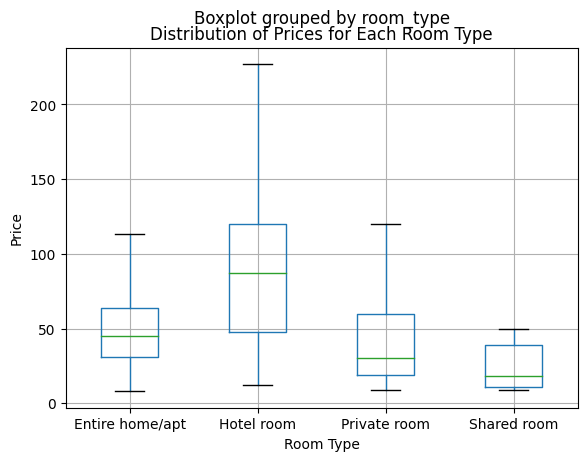

In [36]:
df['price'].head()
df['price'].value_counts()
# Remove the '$' symbol from the 'price' column
df['price'] = df['price'].apply(lambda x: x.replace('$',''))

# Convert the 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group the DataFrame by 'room_type' and calculate summary statistics
price_per_room_type = df.groupby('room_type')['price'].describe()


# Plot the distribution of prices for each room type
df.boxplot(column='price', by='room_type', showfliers=False)

# Set labels and title for the plot
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Distribution of Prices for Each Room Type')

# Show the plot
plt.show()


# Days of the week with the highest mean price

In [37]:
# # Convert the 'date' column to datetime format
cal['date'] = pd.to_datetime(cal['date'])

# # Extract the day of the week from the 'date' column (Monday=0, Sunday=6)
cal['day_of_week'] = cal['date'].dt.dayofweek

# Calculate the mean price for each day of the week
mean_prices = df.groupby(cal['day_of_week'])['price'].mean()

# Sort the days of the week by their mean prices in descending order
sorted_days = mean_prices.sort_values(ascending=False)

list1 ={'0':'Monday','1': 'Tuesday','2': 'Wednesday','3': 'Thursday','4':'Friday','5': 'Saturday','6':'Sunday'}

sorted_days = pd.DataFrame(sorted_days)
sorted_days = sorted_days.reset_index()
sorted_days['day_of_week'] = sorted_days['day_of_week'].replace([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday',
                                                                                
                                                                                 'Thursday','Friday', 'Saturday', 'Sunday'])
print(f"Days of the week with the highest mean prices:{sorted_days}")

Days of the week with the highest mean prices:  day_of_week      price
0      Sunday  59.592647
1      Monday  59.542963
2      Friday  58.446840
3    Saturday  57.297539
4   Wednesday  57.105655
5    Thursday  56.055721
6     Tuesday  55.299183


# Represent listings_ cleansed in numerical form


We have already did this, when we examined the amenities. We rewrite the code below

In [38]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Convert the 'amenities' column from string to list of items
df['lists_column'] = df['amenities'].apply(lambda x: ast.literal_eval(x))

# Create a DataFrame for the 'lists_column' column
amen = pd.DataFrame(df['lists_column'])

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'lists_column' column into binary variables
dummy_variables = pd.DataFrame(mlb.fit_transform(amen['lists_column']), columns=mlb.classes_)

# Concatenate the dummy variables with the original DataFrame
amen = pd.concat([amen, dummy_variables], axis=1)

# Remove the original 'lists_column' column
amen.drop('lists_column', axis=1, inplace=True)

# Return the resulting DataFrame
amen


,2 hotplates electric stove,"22"" HDTV","24"" HDTV with Netflix, Chromecast","32"" HDTV","32"" HDTV with Netflix","32"" TV","38"" HDTV with Netflix","40"" HDTV","40"" HDTV with Netflix","42"" HDTV with Netflix",...,Zealots of nature by Coco-mat conditioner,Zealots of nature by Coco-mat shampoo,duża lodówka refrigerator,intesit refrigerator,lenor conditioner,pitsos electric stove,pitsos oven,różne body soap,różne conditioner,Ηλεκτρικές εστίες induction stove
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Session information

In [39]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.6.2
numpy               1.23.5
pandas              1.5.3
seaborn             0.11.0
session_info        1.0.0
sklearn             1.1.3
-----
IPython             8.7.0
jupyter_client      7.4.8
jupyter_core        5.1.0
jupyterlab          3.5.1
notebook            6.5.2
-----
Python 3.9.0 (tags/v3.9.0:9cf6752, Oct  5 2020, 15:34:40) [MSC v.1927 64 bit (AMD64)]
Windows-10-10.0.22621-SP0
-----
Session information updated at 2023-05-29 21:08
